# Decomposition of Time Series (Trend, Seasonality)

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv(r"/Users/meetsudra/Documents/GitHub/timeseries/datasets/AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.rename(columns={"#Passengers":"Passengers"},inplace=True)
df.columns

Index(['Month', 'Passengers'], dtype='object')

In [4]:
df.shape

(144, 2)

In [5]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [6]:
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index("Month")

In [7]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0, 0.5, 'Passengers')

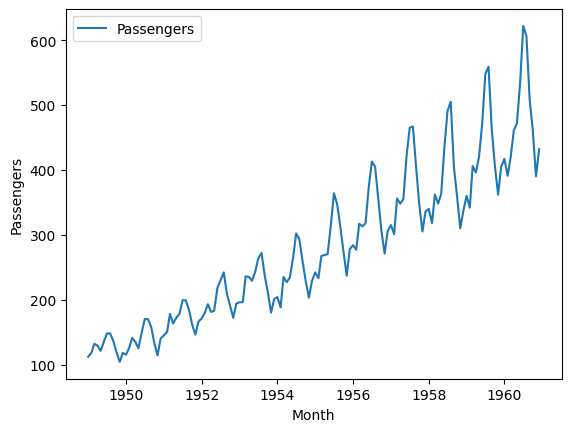

In [8]:
sns.lineplot(df)
plt.ylabel("Passengers")

The above data has trend and seasonality

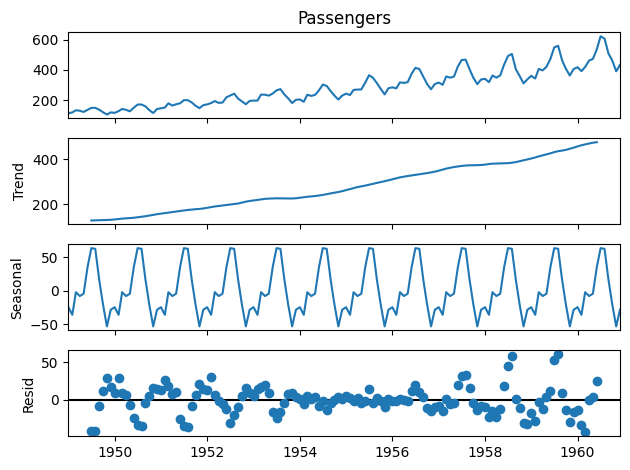

In [13]:
# Decomposiiton of Time Series - Additive 
result = seasonal_decompose(df["Passengers"], model="additive")
result.plot()
plt.show()

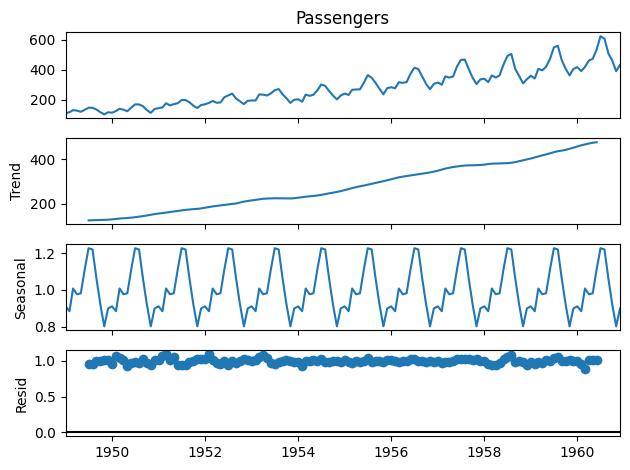

In [14]:
# Decomposition of time series - multiplicativetive model
result = seasonal_decompose(df["Passengers"], model="multiplicative")
result.plot()
plt.show()

Why additive model is better then the multiplicative model?

Because in additive model residual(errors) are near to zero and we want errors to have no correlation with each other (it sould be independent)

Whereas in multiplicative model residual are not scattered hence they have high dependancy with each other 

#### To check Statistically whether the trend is present in the data we use Mann-Kendall test

In [15]:
import pymannkendall as mk
# H0: there is no monotonic trend present in the series 

mk.original_test(df["Passengers"])

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=14.381610025544802, Tau=0.8087606837606838, s=8327.0, var_s=335164.3333333333, slope=2.451216287678477, intercept=90.23803543098887)

p-value < 0.5 (less then significant alpha) ==> we reject Null hypothesis 

And thus There is a monotonic trend present in the data 

In [16]:
train_df = df[:int(df.shape[0]*0.7)]
test_df = df[int(df.shape[0]*0.7):]

In [17]:
train_df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Exponential Smoothing 

### Single Exponential Smoothing (simple) is used when there is no trend and seasonality present in the time series 

In [18]:
from statsmodels.tsa.api import SimpleExpSmoothing
model = SimpleExpSmoothing(train_df)
model_single_fit = model.fit()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [19]:
forecast_single = model_single_fit.forecast(10)
print(forecast_single)

1957-05-01    348.0
1957-06-01    348.0
1957-07-01    348.0
1957-08-01    348.0
1957-09-01    348.0
1957-10-01    348.0
1957-11-01    348.0
1957-12-01    348.0
1958-01-01    348.0
1958-02-01    348.0
Freq: MS, dtype: float64


In [20]:
model_single_fit.params

{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

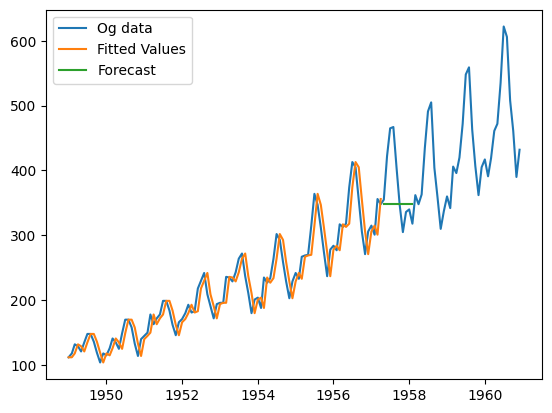

In [26]:
# Visualizing the Single Exponential Smoothing 
plt.plot(df,label="Og data")
plt.plot(model_single_fit.fittedvalues, label="Fitted Values")
plt.plot(forecast_single,label="Forecast")
plt.legend()

#### Now since the trend and seasonality was present in the graph, the SES couldnt work well

### Double Exponential Smoothing is used when there is trend present in the data 

In [27]:
from statsmodels.tsa.api import Holt
model_double = Holt(train_df)
model_double_fit = model_double.fit() 


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [28]:
forecast_double = model_double_fit.forecast(10)
print(forecast_double)

1957-05-01    352.234331
1957-06-01    356.468662
1957-07-01    360.702993
1957-08-01    364.937324
1957-09-01    369.171655
1957-10-01    373.405986
1957-11-01    377.640317
1957-12-01    381.874647
1958-01-01    386.108978
1958-02-01    390.343309
Freq: MS, dtype: float64


In [29]:
model_double_fit.params # this time it will give alpha and beta value

{'smoothing_level': 0.9999999850988388,
 'smoothing_trend': 0.00685166901776703,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

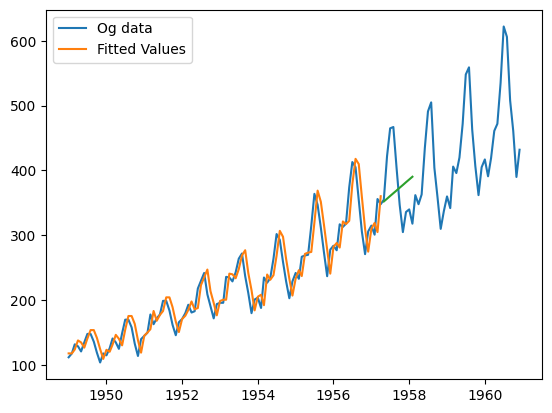

In [33]:
# Visualizing the double ExponentialSmoothing 
plt.plot(df, label="Og data")
plt.plot(model_double_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_double)
plt.legend()

#### Now since the time series includes seasonality as well Holts model didnt work well

### Triple Exponential Smoothing is used when there is trend and seasonality in the data

In [34]:
from statsmodels.tsa.api import ExponentialSmoothing

model_triple = ExponentialSmoothing(train_df, seasonal_periods=12, trend='add', seasonal='add')

# Fit the model to the data 
model_triple_fit = model_triple.fit()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [36]:
forecast_triple = model_triple_fit.forecast(44)
print(forecast_triple)

1957-05-01    351.239543
1957-06-01    403.308153
1957-07-01    439.936842
1957-08-01    426.799849
1957-09-01    375.972944
1957-10-01    329.109352
1957-11-01    295.900796
1957-12-01    333.331230
1958-01-01    343.405189
1958-02-01    331.809102
1958-03-01    384.455074
1958-04-01    374.284115
1958-05-01    379.140970
1958-06-01    431.209580
1958-07-01    467.838269
1958-08-01    454.701276
1958-09-01    403.874371
1958-10-01    357.010779
1958-11-01    323.802223
1958-12-01    361.232657
1959-01-01    371.306616
1959-02-01    359.710529
1959-03-01    412.356500
1959-04-01    402.185542
1959-05-01    407.042397
1959-06-01    459.111007
1959-07-01    495.739695
1959-08-01    482.602703
1959-09-01    431.775798
1959-10-01    384.912206
1959-11-01    351.703649
1959-12-01    389.134084
1960-01-01    399.208043
1960-02-01    387.611956
1960-03-01    440.257927
1960-04-01    430.086968
1960-05-01    434.943823
1960-06-01    487.012433
1960-07-01    523.641122
1960-08-01    510.504130


In [37]:
model_triple_fit.params

{'smoothing_level': 0.25502409644733953,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': 0.7449759035526604,
 'damping_trend': nan,
 'initial_level': 118.79369258860507,
 'initial_trend': 2.32511889597587,
 'initial_seasons': array([ -9.1182135 ,  -3.51544538,   8.9628747 ,   3.69155202,
         -5.06863947,   9.03412103,  21.2493316 ,  18.82216594,
          4.68902045, -14.11744989, -28.55924116, -11.94868029]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

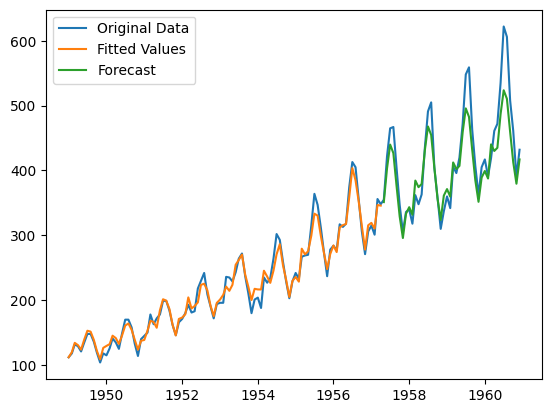

In [38]:
# Visualizing the triple Exponential Smoothing
plt.plot(df, label= 'Original Data')
plt.plot(model_triple_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_triple, label='Forecast')
plt.legend()
plt.show()

### Mean Absolute Percentage Error (MAPE) For checking the accuracy of the model
- we check accuracy on test data

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

mape_train = mean_absolute_percentage_error(train_df['Passengers'], model_triple_fit.fittedvalues)
mape_train

0.035383534335008716

In [41]:
mape_test = mean_absolute_percentage_error(test_df['Passengers'], forecast_triple)
mape_test

0.05397242164126972

### This was the Simple working of Exponential Smoothing